<a href="https://colab.research.google.com/github/pradiptars/Ml_kaggle_HCT-Survival-Predictions/blob/main/Copy_of_CIBMTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [185]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv


In [186]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [187]:
df = pd.concat([train, test])

In [188]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [189]:
df.keys()

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [190]:
df.select_dtypes(include='object').columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe',
       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate'],
      dtype='object')

In [191]:
df['dri_score'].value_counts()

,count
dri_score,
Intermediate,10437
N/A - pediatric,4779
High,4701
N/A - non-malignant indication,2429
TBD cytogenetics,2003
Low,1926
High - TED AML case <missing cytogenetics,1414
Intermediate - TED AML case <missing cytogenetics,481
N/A - disease not classifiable,272


# dri_score convert to numaric #this is our terget columns

In [192]:
'''for cat_var in ['Intermediate', 'N/A - pediatric', 'High', ]:
  df['area_type'+cat_var] = np.where(df['area_type']==cat_var, 1, 0)
df.head(2)'''

"for cat_var in ['Intermediate', 'N/A - pediatric', 'High', ]:\n  df['area_type'+cat_var] = np.where(df['area_type']==cat_var, 1, 0)\ndf.head(2)"

In [193]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# Lebel Encoding

In [194]:
order_lebel = {'Intermediate': 2, 'N/A - pediatric': 1, 'High': 3, 'N/A - non-malignant indication' : 4, 'TBD cytogenetics' : 5, 'Low' : 6, 'High - TED AML case <missing cytogenetics' : 7 }
df['dri_score'] = df['dri_score'].map(order_lebel)


In [195]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,4.0,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,2.0,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [196]:
df['psych_disturb'].value_counts()

,count
psych_disturb,
No,23008
Yes,3587
Not done,146


In [197]:
order_lebel = {'No': 2, 'Yes': 1, 'Not done' : 3 }
df['psych_disturb'] = df['psych_disturb'].map(order_lebel)

In [198]:
df['cyto_score'].value_counts()

,count
cyto_score,
Poor,8802
Intermediate,6377
Favorable,3011
TBD,1341
Normal,643
Other,504
Not tested,55


In [199]:
order_lebel = {'Poor': 1, 'Intermediate': 2, 'Favorable' : 3, 'TBD' : 4, 'Normal' : 5, 'Other' : 6}
df['cyto_score'] = df['cyto_score'].map(order_lebel)

In [200]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,2.0,2.0,2.0,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [201]:
df['diabetes'].value_counts()

,count
diabetes,
No,22204
Yes,4339
Not done,141


In [202]:
order_lebel = {'No': 2, 'Yes': 1, 'Not done' : 3 }
df['diabetes'] = df['diabetes'].map(order_lebel)

In [203]:
df.select_dtypes(include='object').columns

Index(['tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match',
       'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity',
       'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match',
       'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph',
       'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild',
       'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac',
       'pulm_moderate'],
      dtype='object')

In [204]:
df['tbi_status'].value_counts()

,count
tbi_status,
No TBI,18863
TBI + Cy +- Other,6104
"TBI +- Other, <=cGy",1727
"TBI +- Other, >cGy",1701
"TBI +- Other, -cGy, single",134
"TBI +- Other, -cGy, fractionated",119
"TBI +- Other, -cGy, unknown dose",79
"TBI +- Other, unknown dose",76


In [205]:
order_lebel = {'No TBI': 1, 'TBI + Cy +- Other': 2, 'TBI + Cy': 3, 'TBI + Other': 4, 'TBI': 5 }
df['tbi_status'] = df['tbi_status'].map(order_lebel)


In [206]:
df['arrhythmia'].value_counts()

,count
arrhythmia,
No,25206
Yes,1277
Not done,118


In [207]:
order_lebel = {'No': 2, 'Yes': 1, 'Not done' : 3 }
df['arrhythmia'] = df['arrhythmia'].map(order_lebel)

In [208]:
df['graft_type'].value_counts()

,count
graft_type,
Peripheral blood,20547
Bone marrow,8256


In [209]:
order_lebel = {'Peripheral blood': 2, 'Bone marrow': 1, 'Cord blood' : 3 }
df['graft_type'] = df['graft_type'].map(order_lebel)


In [210]:
df['vent_hist'].value_counts()

,count
vent_hist,
No,27724
Yes,820


In [211]:
order_lebel = {'No': 2, 'Yes': 1 }
df['vent_hist'] = df['vent_hist'].map(order_lebel)


In [212]:
df['renal_issue'].value_counts()

,count
renal_issue,
No,26551
Yes,200
Not done,137


In [213]:
order_lebel = {'No': 2, 'Yes': 1, 'Not done' : 3 }
df['renal_issue'] = df['renal_issue'].map(order_lebel)

In [214]:
df['pulm_severe'].value_counts()

,count
pulm_severe,
No,24782
Yes,1706
Not done,180


In [215]:
order_lebel = {'No': 2, 'Yes': 1, 'Not done' : 3 }
df['pulm_severe'] = df['pulm_severe'].map(order_lebel)

In [216]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,2.0,2.0,2.0,2.0,2.0,8.0,NaN,2.0,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [217]:
df.select_dtypes(include='object').columns

Index(['prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe',
       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate'],
      dtype='object')

In [218]:
df['prim_disease_hct'].value_counts()

,count
prim_disease_hct,
ALL,8102
AML,7136
MDS,3046
IPA,1719
MPN,1656
IEA,1450
NHL,1319
IIS,1024
PCD,869


In [219]:
order_lebel = {'ALL': 1, 'AML': 2, 'MDS' : 3, 'IPA':4, 'MPN' :5, 'IEA' :6, 'NHL' :7 , 'IIS' :8, 'PCD':9 }
df['prim_disease_hct'] = df['prim_disease_hct'].map(order_lebel)


In [220]:
df['cmv_status'].value_counts()

,count
cmv_status,
+/+,13599
-/+,7081
+/-,4048
-/-,3441


In [221]:
order_lebel = {'+/+': 1, '-/+': 2, '+/-' : 3, '-/-':4}
df['cmv_status'] = df['cmv_status'].map(order_lebel)

In [222]:
df['tce_imm_match'].value_counts()

,count
tce_imm_match,
P/P,13116
G/G,2522
H/H,1084
G/B,544
H/B,229
P/H,83
P/B,66
P/G,25


In [223]:
order_lebel = {'P/P': 1, 'G/G': 2, 'H/H' : 3, 'G/B':4, 'H/B' :5, 'B/B' :6, 'P/G' :7, 'P/H' :8, 'G/H' :9, 'H/P' :10, 'B/G' :11, 'B/H' :12 }
df['tce_imm_match'] = df['tce_imm_match'].map(order_lebel)

In [224]:
df['rituximab'].value_counts()

,count
rituximab,
No,26036
Yes,619


In [225]:
order_lebel = {'Yes': 1, 'No': 2}
df['rituximab'] = df['rituximab'].map(order_lebel)

In [226]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,2.0,2.0,2.0,2.0,2.0,8.0,NaN,2.0,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [227]:
df.select_dtypes(include='object').columns

Index(['prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe',
       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate'],
      dtype='object')

In [228]:
df['prod_type'].value_counts()

,count
prod_type,
PB,20382
BM,8421


In [229]:
order_lebel = {'PB': 1, 'BM': 2}
df['prod_type'] = df['prod_type'].map(order_lebel)

In [230]:
df['cyto_score_detail'].value_counts()

,count
cyto_score_detail,
Intermediate,11159
Poor,3323
Favorable,1208
TBD,1043
Not tested,145


In [231]:
order_lebel = {'Intermediate': 1, 'Poor': 2, 'Favorable': 3, 'TBD':4, 'Not tested':0}
df['cyto_score_detail'] = df['cyto_score_detail'].map(order_lebel)

In [232]:
df['conditioning_intensity'].value_counts()

,count
conditioning_intensity,
MAC,12289
RIC,7722
NMA,3479
TBD,373
No drugs reported,87
"N/A, F(pre-TED) not submitted",62


In [233]:
order_lebel = {'MAC': 1, 'RIC': 2, 'NMA': 3, 'TBD':4, 'No drugs reported':0, 'N/A, F(pre-TED) not submitted' : 5}
df['conditioning_intensity'] = df['conditioning_intensity'].map(order_lebel)

In [234]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match',
       'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph',
       'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild',
       'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac',
       'pulm_moderate'],
      dtype='object')

In [235]:
df['peptic_ulcer'].value_counts()

,count
peptic_ulcer,
No,25959
Yes,259
Not done,166


In [236]:
order_lebel = {'Yes': 1, 'No': 2, 'Not done' : 3}
df['peptic_ulcer'] = df['peptic_ulcer'].map(order_lebel)

In [237]:
df['prior_tumor'].value_counts()

,count
prior_tumor,
No,23831
Yes,3009
Not done,285


In [238]:
order_lebel = {'Yes': 1, 'No': 2, 'Not done' : 3}
df['prior_tumor'] = df['prior_tumor'].map(order_lebel)

In [239]:
df['hepatic_severe'].value_counts()

,count
hepatic_severe,
No,25241
Yes,1481
Not done,210


In [240]:
order_lebel = {'Yes': 1, 'No': 2, 'Not done' : 3}
df['hepatic_severe'] = df['hepatic_severe'].map(order_lebel)

In [241]:
df['in_vivo_tcd'].value_counts()

,count
in_vivo_tcd,
No,17592
Yes,10986


In [242]:
order_lebel = {'Yes': 1, 'No': 2}
df['in_vivo_tcd'] = df['in_vivo_tcd'].map(order_lebel)

In [243]:
df['obesity'].value_counts()

,count
obesity,
No,25147
Yes,1779
Not done,117


In [244]:
order_lebel = {'Yes': 1, 'No': 2, 'Not done' : 3}
df['obesity'] = df['obesity'].map(order_lebel)

In [245]:
df['mrd_hct'].value_counts()

,count
mrd_hct,
Negative,8068
Positive,4136


In [246]:
order_lebel = {'Negative': 1, 'Positive': 2}
df['mrd_hct'] = df['mrd_hct'].map(order_lebel)

In [247]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,2.0,2.0,2.0,2.0,2.0,8.0,NaN,2.0,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [248]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'tce_match', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate'],
      dtype='object')

In [249]:
df['tce_match'].value_counts()

,count
tce_match,
Permissive,6273
GvH non-permissive,1605
Fully matched,1059
HvG non-permissive,868


In [250]:
order_lebel = {'Permissive': 1, 'GvH non-permissive': 2, 'Fully matched' : 3, 'Half matched' : 4, 'No match' : 5}
df['tce_match'] = df['tce_match'].map(order_lebel)

In [251]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose',
       'cardiac', 'pulm_moderate'],
      dtype='object')

In [252]:
df['donor_related'].value_counts()

,count
donor_related,
Related,16210
Unrelated,12089
Multiple donor (non-UCB),346


In [253]:
order_lebel = {'Related': 1, 'Unrelated': 2, 'Multiple donor (non-UCB)' : 3}
df['donor_related'] = df['donor_related'].map(order_lebel)

In [254]:
df['cardiac'].value_counts()

,count
cardiac,
No,24595
Yes,1519
Not done,147


In [255]:
order_lebel = {'Yes': 1, 'No': 2, 'Not done' : 3}
df['hepatic_severe'] = df['hepatic_severe'].map(order_lebel)

In [256]:
df.head(2)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,6.0,...,NaN,2.0,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,2.0,2.0,2.0,2.0,2.0,8.0,NaN,2.0,6.0,...,Permissive mismatched,1.0,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672


In [257]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'hepatic_mild', 'tce_div_match', 'melphalan_dose', 'cardiac',
       'pulm_moderate'],
      dtype='object')

# Drop catagorical columns

In [258]:
df = df.drop(columns=['ethnicity', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'melphalan_dose','cardiac', 'pulm_moderate'], axis=1)
df.head()


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,donor_related,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,6.0,...,2.0,2.0,0.0,90.0,2.0,8.0,2.0,10.0,0.0,42.356
1,1,2.0,2.0,2.0,2.0,2.0,8.0,NaN,2.0,6.0,...,2.0,2.0,3.0,90.0,1.0,8.0,2.0,10.0,1.0,4.672
2,2,4.0,2.0,NaN,2.0,2.0,8.0,1.0,2.0,6.0,...,2.0,2.0,0.0,90.0,1.0,8.0,2.0,10.0,0.0,19.793
3,3,3.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,6.0,...,2.0,2.0,0.0,90.0,2.0,8.0,2.0,10.0,0.0,102.349
4,4,3.0,2.0,NaN,2.0,2.0,8.0,1.0,2.0,6.0,...,2.0,2.0,1.0,90.0,1.0,8.0,2.0,10.0,0.0,16.223


# Missing Value Inputation

In [259]:
df.isnull().sum()

,0
ID,0
dri_score,1114
psych_disturb,2062
cyto_score,8125
diabetes,2119
hla_match_c_high,4621
hla_high_res_8,5830
tbi_status,3836
arrhythmia,2202
hla_low_res_6,3270


<Axes: >

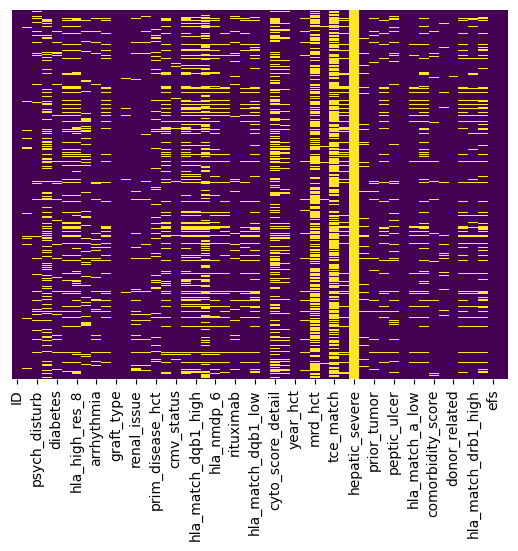

In [260]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [261]:
df = df.fillna(df.mean())

In [262]:
df.isnull().sum()

,0
ID,0
dri_score,0
psych_disturb,0
cyto_score,0
diabetes,0
hla_match_c_high,0
hla_high_res_8,0
tbi_status,0
arrhythmia,0
hla_low_res_6,0


In [263]:
df = df.drop(columns=['hepatic_severe'], axis=1)
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,donor_related,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
0,0,4.0,2.0,2.040429,2.0,1.764536,6.876899,1.000000,2.0,6.0,...,2.0,2.0,0.0,90.0,2.0,8.0,2.0,10.0,0.0,42.356
1,1,2.0,2.0,2.000000,2.0,2.000000,8.000000,1.244483,2.0,6.0,...,2.0,2.0,3.0,90.0,1.0,8.0,2.0,10.0,1.0,4.672
2,2,4.0,2.0,2.040429,2.0,2.000000,8.000000,1.000000,2.0,6.0,...,2.0,2.0,0.0,90.0,1.0,8.0,2.0,10.0,0.0,19.793
3,3,3.0,2.0,2.000000,2.0,2.000000,8.000000,1.000000,2.0,6.0,...,2.0,2.0,0.0,90.0,2.0,8.0,2.0,10.0,0.0,102.349
4,4,3.0,2.0,2.040429,2.0,2.000000,8.000000,1.000000,2.0,6.0,...,2.0,2.0,1.0,90.0,1.0,8.0,2.0,10.0,0.0,16.223


In [264]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [265]:
df.isnull().sum()

,0
ID,0
dri_score,0
psych_disturb,0
cyto_score,0
diabetes,0
hla_match_c_high,0
hla_high_res_8,0
tbi_status,0
arrhythmia,0
hla_low_res_6,0


<Axes: >

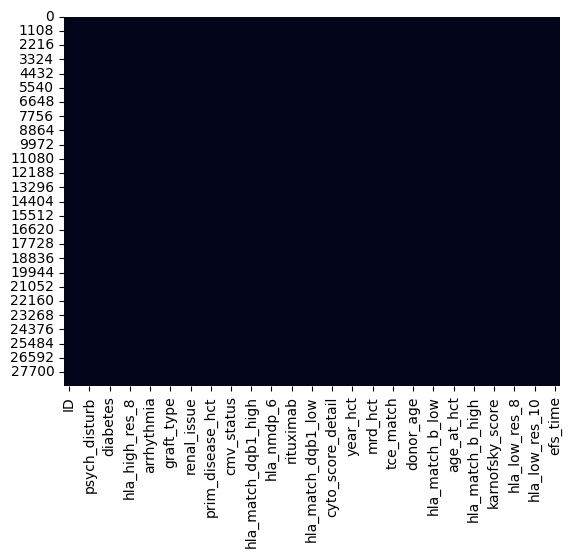

In [266]:
sns.heatmap(df.isnull(), cbar=False)

<Axes: >

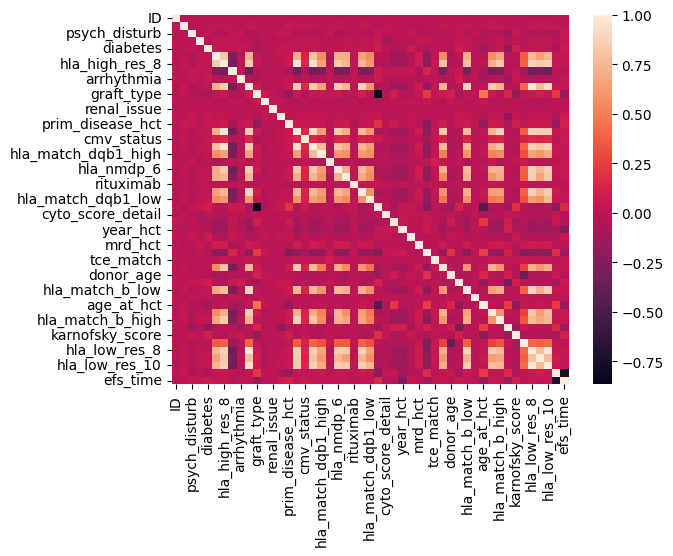

In [267]:
sns.heatmap(df.corr())

# Scale and train data

In [268]:
df.keys()

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'donor_age',
       'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct',
       'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score',
       'karnofsky_score', 'donor_related', 'hla_low_res_8',
       'hla_match_drb1_high', 'hla_low_res_10', 'efs', 'efs_time'],
      dtype='object')

In [269]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [276]:
train_len = train.shape[0]
X_train = df[:train_len]
X_test = df[train_len:]
y_train = train['efs_time']


In [277]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(28800, 49)
(3, 49)
(28800,)


In [278]:
y_train

,efs_time
0,42.356
1,4.672
2,19.793
3,102.349
4,16.223
...,...
28795,18.633
28796,4.892
28797,23.157
28798,52.351


# Cross validation

In [279]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# User define function for all score

In [280]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score


# Linear regration

In [281]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
test_model(lr, X_train, y_train)

[np.float64(1.0)]

In [282]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=0.1)
test_model(ridge, X_train, y_train)

[np.float64(0.9999999998864355)]

In [283]:
lasso = Lasso(alpha=0.1)
test_model(lasso, X_train, y_train)

[np.float64(0.9999770091873522)]

Linear regratin gives us maxmimum accuracy

In [284]:
lr.fit(X_train, y_train)

LinearRegression()

In [285]:
y_pred = np.exp(lr.predict(X_test))

In [286]:
y_pred


array([1.23593433e+10, 1.23593433e+10, 1.23593433e+10])

In [288]:
submit_test = pd.concat([test['ID'], pd.DataFrame(y_pred, columns=['efs_time'])], axis=1)
submit_test.head()

,ID,efs_time
0,28800,1.235934e+10
1,28801,1.235934e+10
2,28802,1.235934e+10


In [289]:
submit_test.to_csv('HCT Survival Predictions_submission.csv', index=False)

In [290]:
df1 = pd.read_csv('HCT Survival Predictions_submission.csv')
df1.head()

,ID,efs_time
0,28800,1.235934e+10
1,28801,1.235934e+10
2,28802,1.235934e+10


In [291]:
df1 = df1.rename(columns={'efs_time': 'prediction'})

In [292]:
df1.head(2)

,ID,prediction
0,28800,1.235934e+10
1,28801,1.235934e+10


In [293]:
df1.to_csv('HCT Survival Predictions.csv', index=False)